# BAB PENGENALAN

    Nama  : Farand Austen Mahesa
    Kelas : Full Bootcamp Data Science

Tujuan Program
>Pada program ini akan dilakukan Logistic Regression dan SVM untuk memprediksi Cuaca pada Model Inference yang akan dibuat


Isi notebook dibawah ini berupa:
   - Perkenalan
   - Import pustaka yang dibutuhkan
   - Data Loading
   - Data Cleaning
   - Eksplorasi Data
   - Data Preprocessing
   - Pendefinisian Model
   - Pelatihan Model
   - Evaluasi Model
   - Model Inference
   - Pengambilan Kesimpulan

# IMPORT PUSTAKA YANG DIBUTUHKAN

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, auc, roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
import plotly.express as px

# PREPROCESSING

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df[df.isnull().any(axis=1)].count()

Date             89040
Location         89040
MinTemp          87555
MaxTemp          87779
Rainfall         85779
Evaporation      26250
Sunshine         19205
WindGustDir      78714
WindGustSpeed    78777
WindDir9am       78474
WindDir3pm       84812
WindSpeed9am     87273
WindSpeed3pm     85978
Humidity9am      86386
Humidity3pm      84533
Pressure9am      73975
Pressure3pm      74012
Cloud9am         33152
Cloud3pm         29682
Temp9am          87273
Temp3pm          85431
RainToday        85779
RainTomorrow     85773
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

### EKSPLORASI DATA

In [13]:
dfrainyes = df[df['RainTomorrow'] == 'Yes']
dfrainno = df[df['RainTomorrow'] == 'No']

Text(0.5, 1.0, 'WindSpeed9am')

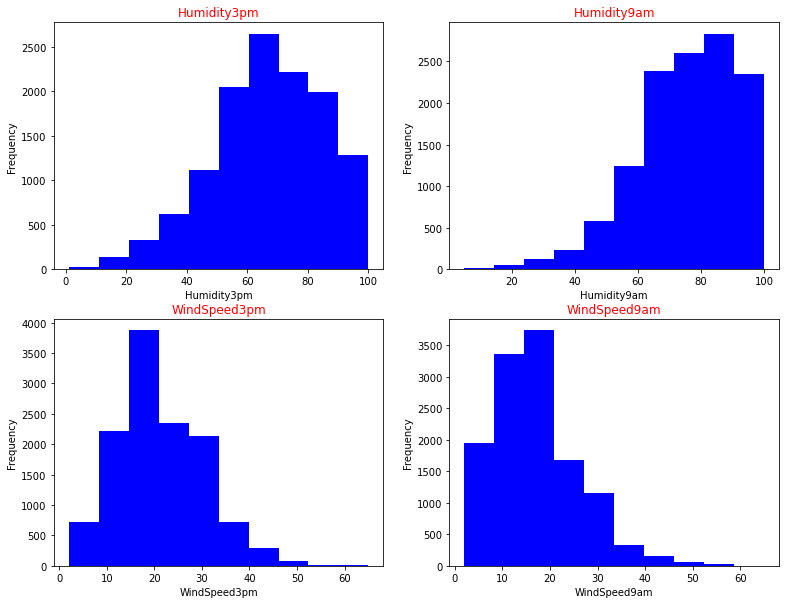

In [14]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(dfrainyes["Humidity3pm"], color="blue")
plt.xlabel("Humidity3pm")
plt.ylabel("Frequency")
plt.title("Humidity3pm", color='red')

plt.subplot(2,2,2)
plt.hist(dfrainyes["Humidity9am"], color="blue")
plt.xlabel("Humidity9am")
plt.ylabel("Frequency")
plt.title("Humidity9am", color='red')

plt.subplot(2,2,3)
plt.hist(dfrainyes["WindSpeed3pm"], color="blue")
plt.xlabel("WindSpeed3pm")
plt.ylabel("Frequency")
plt.title("WindSpeed3pm", color='red')

plt.subplot(2,2,4)
plt.hist(dfrainyes["WindSpeed9am"], color="blue")
plt.xlabel("WindSpeed9am")
plt.ylabel("Frequency")
plt.title("WindSpeed9am", color='red')

In [24]:
plt.figure(figsize=(6,6))
fig1 = px.line(dfrainyes,x = 'Date', y = ['Rainfall'], width=800)
fig1.show()

<Figure size 432x432 with 0 Axes>

In [25]:
fig2 = px.line(dfrainno,x = 'Date', y = ['Rainfall'], width=800)
fig2.show()

In [16]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [17]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222,0.048953,0.087428
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841,-0.221810,-0.147467
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627,0.550515,0.254342
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727,-0.218079,-0.130002
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129,-0.328904,-0.453407
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382,0.146276,0.233158
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357,0.083125,0.083904
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436,0.085627,0.088862
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758,0.379451,0.271033
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245,0.385440,0.455358


In [18]:
dfhour= df[['RainTomorrow','Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Humidity9am', 'RainToday', 'Cloud9am', 'Cloud3pm']]

<AxesSubplot:>

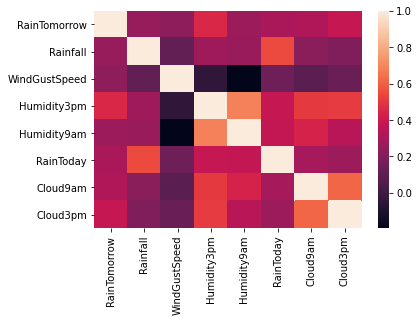

In [19]:
sns.heatmap(dfhour.corr())

In [20]:
dfhour.dropna(axis=0, how='any', inplace=True)

X = dfhour.drop(columns='RainTomorrow')
y = dfhour['RainTomorrow']

<ipython-input-20-08c7af5fe098>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
dfhour

,RainTomorrow,Rainfall,WindGustSpeed,Humidity3pm,Humidity9am,RainToday,Cloud9am,Cloud3pm
6049,0,0.0,48.0,13.0,20.0,0,2.0,5.0
6050,0,0.0,37.0,8.0,30.0,0,1.0,1.0
6052,0,0.0,46.0,22.0,42.0,0,1.0,6.0
6053,0,0.0,31.0,22.0,37.0,0,1.0,5.0
6054,0,0.0,35.0,15.0,19.0,0,1.0,6.0
...,...,...,...,...,...,...,...,...
142298,0,0.0,35.0,32.0,63.0,0,0.0,1.0
142299,0,0.0,37.0,28.0,56.0,0,7.0,0.0
142300,0,0.0,33.0,23.0,46.0,0,0.0,0.0
142301,0,0.0,26.0,58.0,62.0,0,1.0,1.0


### Splitting Data

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)

# LOGISTIC REGRESSION

In [24]:
model_lr1 = LogisticRegression(solver="lbfgs", random_state=69)
%time model_lr1.fit(X_train_trf, y_train)

Wall time: 116 ms


LogisticRegression(random_state=69)

In [25]:
model_lr2 = LogisticRegression(solver="liblinear", random_state=69)
%time model_lr2.fit(X_train_trf, y_train)

Wall time: 82.1 ms


LogisticRegression(random_state=69, solver='liblinear')

In [26]:
model_lr3 = LogisticRegression(solver="saga", random_state=69)
%time model_lr3.fit(X_train_trf, y_train)

Wall time: 130 ms


LogisticRegression(random_state=69, solver='saga')

In [27]:
model_lr4 = LogisticRegression(solver="newton-cg", random_state=69)
%time model_lr4.fit(X_train_trf, y_train)

Wall time: 157 ms


LogisticRegression(random_state=69, solver='newton-cg')

In [28]:
model_lr5 = LogisticRegression(solver="sag", random_state=69)
%time model_lr5.fit(X_train_trf, y_train)

Wall time: 202 ms


LogisticRegression(random_state=69, solver='sag')

### Model Inference Logistic Regression

In [29]:
X_val_trf = scaler.transform(X_val) 

##### solver lbfgs 

In [30]:
#Menggunakan solver lbfgs
%time y_val_predict = model_lr1.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 0 ns
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8793
           1       0.71      0.48      0.57      2491

    accuracy                           0.84     11284
   macro avg       0.78      0.71      0.74     11284
weighted avg       0.83      0.84      0.83     11284



In [31]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 12 ms
[[8295  498]
 [1299 1192]]


In [32]:
%time y_scores = cross_val_predict(model_lr1, X_train, y_train, cv=3,method="decision_function")
y_scores

Wall time: 507 ms


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([-3.24836372, -3.17227058, -2.15870748, ...,  0.95278183,
       -2.03931117, -2.6049329 ])

In [33]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 9.97 ms


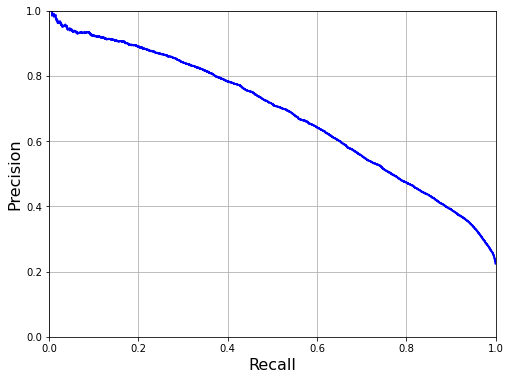

In [34]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### solver liblinear

In [35]:
#Menggunakan solver liblinear
%time y_val_predict = model_lr2.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 1.96 ms
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8793
           1       0.71      0.48      0.57      2491

    accuracy                           0.84     11284
   macro avg       0.78      0.71      0.74     11284
weighted avg       0.83      0.84      0.83     11284



In [36]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 7.98 ms
[[8295  498]
 [1299 1192]]


In [37]:
%time y_scores = cross_val_predict(model_lr2, X_train, y_train, cv=3,method="decision_function")

Wall time: 435 ms


In [38]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 8.98 ms


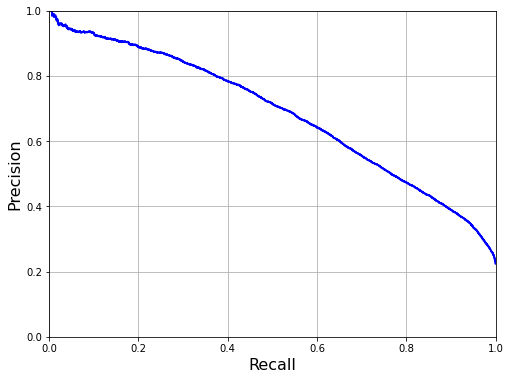

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### solver saga

In [40]:
#Menggunakan solver saga
%time y_val_predict = model_lr3.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 0 ns
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8793
           1       0.71      0.48      0.57      2491

    accuracy                           0.84     11284
   macro avg       0.78      0.71      0.74     11284
weighted avg       0.83      0.84      0.83     11284



In [41]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 7.97 ms
[[8295  498]
 [1299 1192]]


In [42]:
%time y_scores = cross_val_predict(model_lr2, X_train, y_train, cv=3,method="decision_function")

Wall time: 404 ms


In [43]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 12 ms


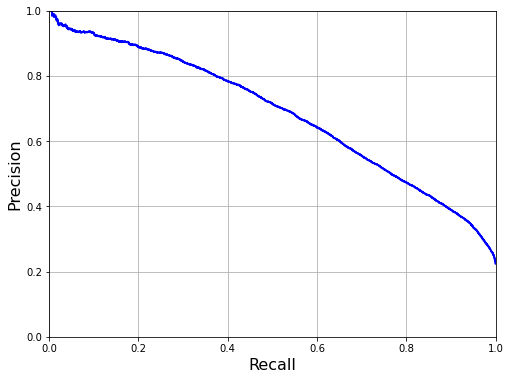

In [44]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### solver newton-cg

In [45]:
#Menggunakan solver newton-cg
%time y_val_predict = model_lr4.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 998 µs
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8793
           1       0.71      0.48      0.57      2491

    accuracy                           0.84     11284
   macro avg       0.78      0.71      0.74     11284
weighted avg       0.83      0.84      0.83     11284



In [46]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 13 ms
[[8295  498]
 [1299 1192]]


In [47]:
%time y_scores = cross_val_predict(model_lr4, X_train, y_train, cv=3,method="decision_function")

Wall time: 1.1 s


In [48]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 8.98 ms


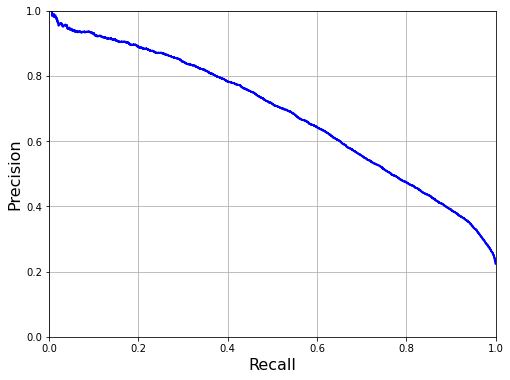

In [49]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### solver sag

In [50]:
#Menggunakan solver sag
%time y_val_predict = model_lr5.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 959 µs
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8793
           1       0.71      0.48      0.57      2491

    accuracy                           0.84     11284
   macro avg       0.78      0.71      0.74     11284
weighted avg       0.83      0.84      0.83     11284



In [51]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 7.98 ms
[[8295  498]
 [1299 1192]]


In [52]:
%time y_scores = cross_val_predict(model_lr5, X_train, y_train, cv=3,method="decision_function")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Wall time: 1.46 s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [53]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 8.98 ms


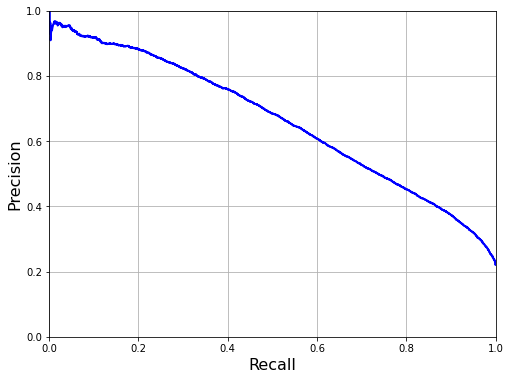

In [54]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

#### MODEL ANALYSIS (ROC CURVE)

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

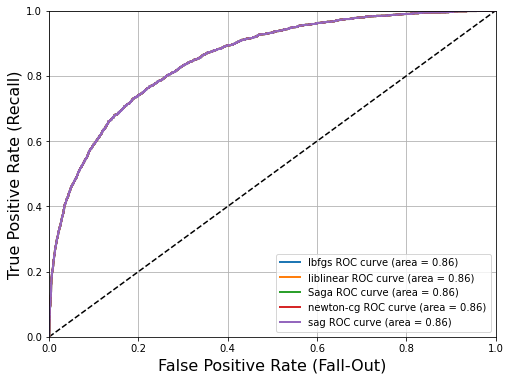

In [56]:
plt.figure(figsize=(8, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') 
labels=['lbfgs','liblinear','Saga', 'newton-cg', 'sag']
for idx,model in enumerate([model_lr1, model_lr2, model_lr3, model_lr4, model_lr5]):
    y_scores = model.decision_function(X_val_trf)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

# SVM

In [57]:
model_svc_linear = SVC(kernel='linear', random_state=69,C=10)
%time model_svc_linear.fit(X_train_trf, y_train)

Wall time: 1min 48s


SVC(C=10, kernel='linear', random_state=69)

In [58]:
model_svc_linear01 = SVC(kernel='linear', random_state=69, C=0.1)
%time model_svc_linear01.fit(X_train_trf, y_train)

Wall time: 31.7 s


SVC(C=0.1, kernel='linear', random_state=69)

In [59]:
model_svc_rbf = SVC(kernel='rbf', random_state=69,C=10)
%time model_svc_rbf.fit(X_train_trf, y_train)

Wall time: 1min 54s


SVC(C=10, random_state=69)

In [60]:
model_svc_rbf01 = SVC(kernel='rbf', random_state=69,C=0.1)
%time model_svc_rbf01.fit(X_train_trf, y_train)

Wall time: 52.1 s


SVC(C=0.1, random_state=69)

In [61]:
model_svc_poly = SVC(kernel='poly',degree=4, random_state=69,C=10)
%time model_svc_poly.fit(X_train_trf, y_train)

Wall time: 17min 48s


SVC(C=10, degree=4, kernel='poly', random_state=69)

In [62]:
model_svc_poly01 = SVC(kernel='poly',degree=4, random_state=69,C=0.1)
%time model_svc_poly01.fit(X_train_trf, y_train)

Wall time: 51.3 s


SVC(C=0.1, degree=4, kernel='poly', random_state=69)

In [63]:
model_svc_sigmoid = SVC(kernel='sigmoid',degree=4, random_state=69,C=10)
%time model_svc_sigmoid.fit(X_train_trf, y_train)

Wall time: 39 s


SVC(C=10, degree=4, kernel='sigmoid', random_state=69)

In [64]:
model_svc_sigmoid01 = SVC(kernel='sigmoid', random_state=69,C=0.1)
%time model_svc_sigmoid01.fit(X_train_trf, y_train)

Wall time: 42.1 s


SVC(C=0.1, kernel='sigmoid', random_state=69)

### Model Inference SVC

##### kernel linear c = 10

In [67]:
#Menggunakan kernel linear c = 10
%time y_val_predict = model_svc_linear.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 5.62 s
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8793
           1       0.73      0.44      0.55      2491

    accuracy                           0.84     11284
   macro avg       0.80      0.70      0.73     11284
weighted avg       0.83      0.84      0.83     11284



In [68]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 8.98 ms
[[8389  404]
 [1383 1108]]


In [69]:
%time y_scores = cross_val_predict(model_svc_linear, X_train, y_train, cv=3,method="decision_function")

Wall time: 44min 49s


In [70]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 11.9 ms


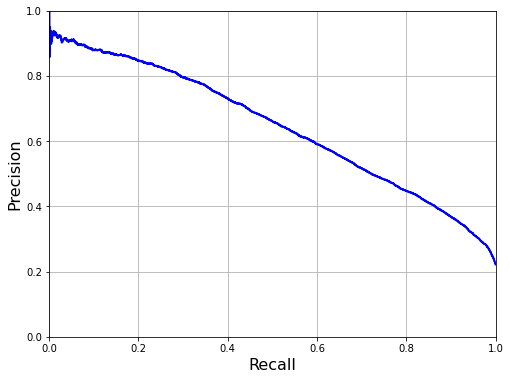

In [71]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### kernel linear c = 0.1

In [72]:
#Menggunakan kernel linear c = 0,1
%time y_val_predict = model_svc_linear01.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 5.28 s
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8793
           1       0.73      0.44      0.55      2491

    accuracy                           0.84     11284
   macro avg       0.80      0.70      0.73     11284
weighted avg       0.83      0.84      0.83     11284



In [73]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 6.77 ms
[[8389  404]
 [1384 1107]]


In [74]:
%time y_scores = cross_val_predict(model_svc_linear01, X_train, y_train, cv=3,method="decision_function")

Wall time: 4min 7s


In [75]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 10.2 ms


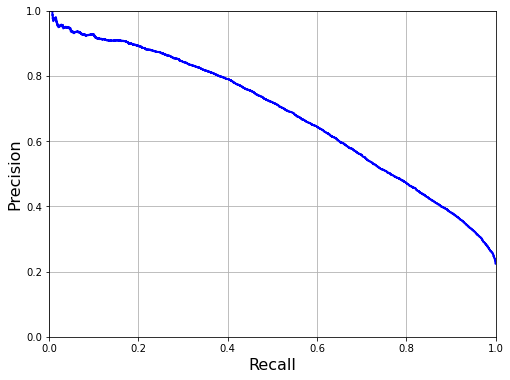

In [76]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### kernel rbf c = 10

In [77]:
#Menggunakan kernel rbf c = 10
%time y_val_predict = model_svc_rbf.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 19 s
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8793
           1       0.75      0.42      0.54      2491

    accuracy                           0.84     11284
   macro avg       0.80      0.69      0.72     11284
weighted avg       0.83      0.84      0.82     11284



In [78]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 10.3 ms
[[8451  342]
 [1449 1042]]


In [79]:
%time y_scores = cross_val_predict(model_svc_rbf, X_train, y_train, cv=3,method="decision_function")

Wall time: 2min 11s


In [80]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 7.53 ms


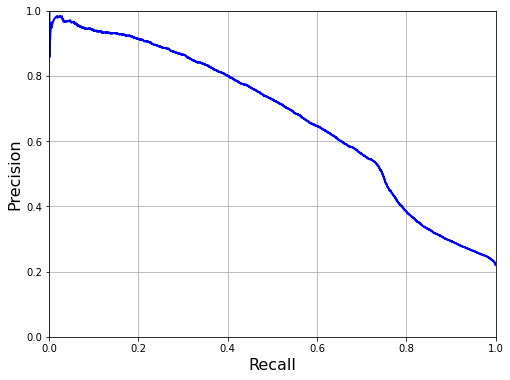

In [81]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### kernel rbf c = 0.1

In [82]:
#Menggunakan kernel rbf c = 0,1
%time y_val_predict = model_svc_rbf01.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 19.3 s
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      8793
           1       0.77      0.41      0.53      2491

    accuracy                           0.84     11284
   macro avg       0.81      0.69      0.72     11284
weighted avg       0.83      0.84      0.82     11284



In [83]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 8.6 ms
[[8487  306]
 [1474 1017]]


In [84]:
%time y_scores = cross_val_predict(model_svc_rbf01, X_train, y_train, cv=3,method="decision_function")

Wall time: 2min 2s


In [85]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 9.01 ms


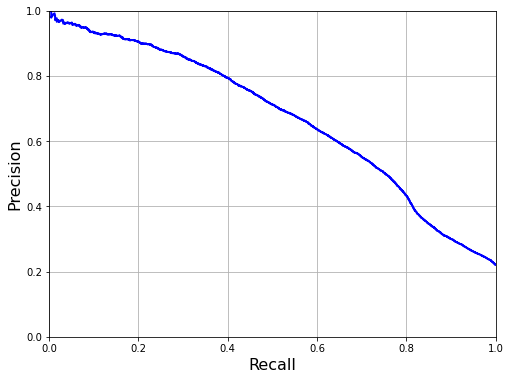

In [86]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### kernel poly c = 10

In [87]:
#Menggunakan kernel poly c = 10
%time y_val_predict = model_svc_poly.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 5.29 s
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8793
           1       0.75      0.42      0.54      2491

    accuracy                           0.84     11284
   macro avg       0.80      0.69      0.72     11284
weighted avg       0.83      0.84      0.82     11284



In [88]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 8.91 ms
[[8444  349]
 [1451 1040]]


In [89]:
%time y_scores = cross_val_predict(model_svc_poly, X_train, y_train, cv=3,method="decision_function")

Wall time: 5min 52s


In [90]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 8.85 ms


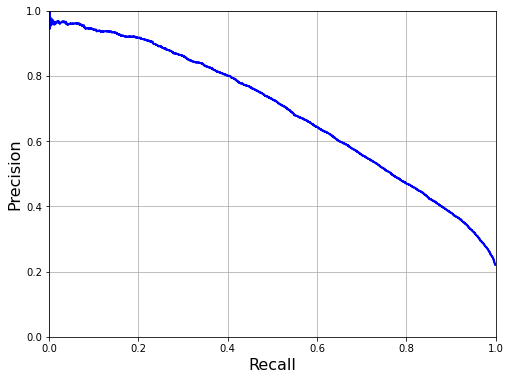

In [91]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### kernel poly c = 0,1

In [92]:
#Menggunakan kernel poly c = 0,1
%time y_val_predict = model_svc_poly01.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 5.3 s
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8793
           1       0.76      0.40      0.52      2491

    accuracy                           0.84     11284
   macro avg       0.80      0.68      0.71     11284
weighted avg       0.83      0.84      0.82     11284



In [93]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 8.05 ms
[[8474  319]
 [1495  996]]


In [94]:
%time y_scores = cross_val_predict(model_svc_poly01, X_train, y_train, cv=3,method="decision_function")

Wall time: 1min 8s


In [95]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 10.2 ms


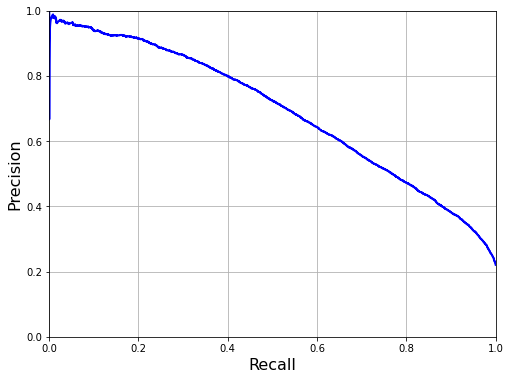

In [96]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### kernel sigmoid c = 10

In [97]:
#Menggunakan kernel sigmoid c = 10
%time y_val_predict = model_svc_sigmoid.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 6.68 s
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      8793
           1       0.38      0.38      0.38      2491

    accuracy                           0.73     11284
   macro avg       0.60      0.60      0.60     11284
weighted avg       0.73      0.73      0.73     11284



In [98]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 11.1 ms
[[7272 1521]
 [1543  948]]


In [99]:
%time y_scores = cross_val_predict(model_svc_sigmoid, X_train, y_train, cv=3,method="decision_function")

Wall time: 1min 59s


In [100]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 10.2 ms


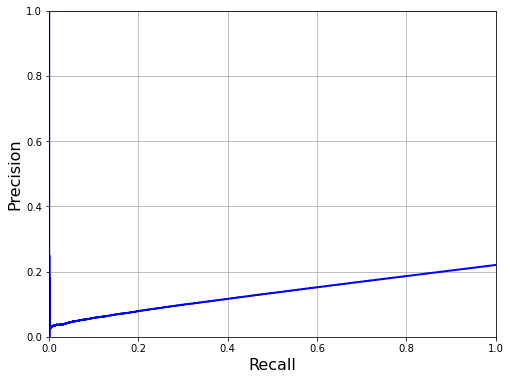

In [101]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

##### kernel sigmoid c = 0,1

In [102]:
#Menggunakan kernel sigmoid c = 0,1
%time y_val_predict = model_svc_sigmoid01.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 6.46 s
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      8793
           1       0.39      0.38      0.38      2491

    accuracy                           0.73     11284
   macro avg       0.61      0.60      0.60     11284
weighted avg       0.73      0.73      0.73     11284



In [103]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)

Wall time: 8.09 ms
[[7305 1488]
 [1552  939]]


In [104]:
%time y_scores = cross_val_predict(model_svc_sigmoid01, X_train, y_train, cv=3,method="decision_function")

Wall time: 1min 58s


In [105]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 8.3 ms


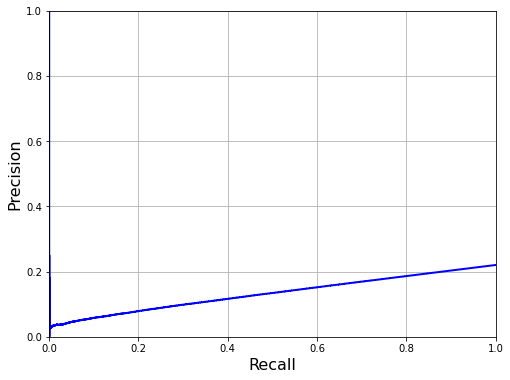

In [106]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### MODEL ANALYSIS (ROC Curve)

In [117]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                           

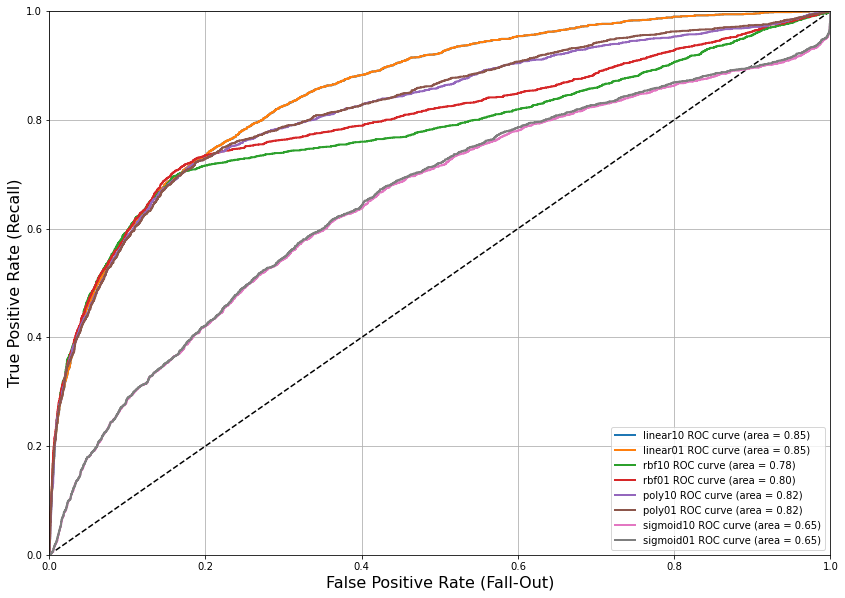

In [122]:
plt.figure(figsize=(14, 10))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') 
labels=['linear10','linear01', 'rbf10', 'rbf01','poly10','poly01','sigmoid10','sigmoid01']
for idx,model in enumerate([model_svc_linear, model_svc_linear01, model_svc_rbf,model_svc_rbf01, model_svc_poly, model_svc_poly01, model_svc_sigmoid, model_svc_sigmoid01]):
    y_scores = model.decision_function(X_val_trf)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")

# OVERALL ANALYSIS

Metode clasification pada program ini akan digunakan 2 metode yaitu, Logistic regression dan SVM untuk mendeteksi apakah besok akan hujan atau tidak
- Menentukan threshold biasanya dari presicion, recall, dan curvenya.
- Fungsi Recall dan Precision juga untuk mengecek akurasi modelnya. Precision makin tinggi, maka recall akan turun.

### LOGISTIC REGRESSION

Pada Logistic Regression telah diuji coba pada Solver. Solver ini difungsikan untuk membatasi output:
##### lbfgs
Pada solver lbfgs saat modelnya dijalankan tidak memakan waktu yang lama, hanya seperkian detik dengan penghitungan metriks, dan juga ketika dijalankan model inference solver lbfgs ini, jupyter mengeluarkan peringatan bahwa koefisien dari angkanya tidak berpusat pada 1, mungkin karena dataset yang diberikan tidak terlalu besar dibawah ini:
- ROC Curve = 0.86
- Precision = 0.71
- Recall = 0.48
- f1 score = 0.57

##### liblinear
- ROC Curve = 0.86
- Precision = 0.71
- Recall = 0.48
- f1 score = 0.57

##### saga
- ROC Curve = 0.86
- Precision = 0.71
- Recall = 0.48
- f1 score = 0.57

##### newton-cg
- ROC Curve = 0.86
- Precision = 0.71
- Recall = 0.48
- f1 score = 0.57

##### sag
Sewaktu dijalankan model inference solver sag ini, jupyter mengeluarkan peringatan bahwa koefisien dari angkanya tidak memusat, mungkin karena dataset yang diberikan tidak terlalu besar
- ROC Curve = 0.86
- Precision = 0.71
- Recall = 0.48
- f1 score = 0.57

##### SEMUA SOLVER SAMA UNTUK DATASET INI 

#### Yang dapat disimpulkan bahwa keempat solver dapet dilakukan pada dataset ini, karena:
- Dataset yang terlalu sedikit
- Tidak ada penalty pada L1
- Masih sedikit memiliki 2 klasifikasi, Yes dan No

### SVM

Pada model SVM telah diuji coba pada Kernel dengan C:
##### linear
Pada kernel linear, mendapatkan Roc dan Auc yang besar, berarti error yang dimiliki sangat sedikit, dan sangat cocok untuk dataset ini. Saat dijalankan pada model inference, membutuhkan waktu yang lama untuk memprosesnya pada saat menjalankan metriks cross val predict membutuhkan waktu 45menit pada c = 10, sedangkan hanya membutuhkan 4menit pada c = 0,1. SVM Linear merupakan kernel yang terbaik digunakan untuk dataset ini. Semakin kecil nilai c, semakin cepat waktu pemrosesannya. 
- 0,1
    - ROC Curve = 0.85
    - Precision = 0.73
    - Recall = 0.44
    - f1 score = 0.55
- 10
    - ROC Curve = 0.85
    - Precision = 0.73
    - Recall = 0.44
    - f1 score = 0.55

##### rbf
Pada kernel rbf ini sangat ditentukan juga oleh c nya. Semakin kecil nilai c, maka semakin besar roc dan precisionnya. rbf dalam kernel ini sebagai default jika kernelnya tidak disebutkan.   
- 0,1
    - ROC Curve = 0.80
    - Precision = 0.77
    - Recall = 0.41
    - f1 score = 0.53
- 10
    - ROC Curve = 0.78
    - Precision = 0.75
    - Recall = 0.42
    - f1 score = 0.54

##### poly
Pada kernel poly menjalankan waktu yang lama saat pemodelan fit dengan pemrosesan waktu 18menit. Tetapi saat model inference tidak membutuhkan waktu yang lama
- 0,1
    - ROC Curve = 0.82
    - Precision = 0.76
    - Recall = 0.40
    - f1 score = 0.52
- 10
    - ROC Curve = 0.82
    - Precision = 0.75
    - Recall = 0.42
    - f1 score = 0.54

##### sigmoid
Pada kernel sigmoid terjadi error pada auc karena garis roc pada sigmoid keluar batas yang dimana garis diagonal tengah merupakan titik terendah, jika melewatinya berarti kernel sigmoid ini tidak cocok buat dataset ini dan saat dijalankan membutuhkan waktu 1 menit untuk memprosesnya. Dan pada kernel sigmoid menghasilkan error yang sangat banyak
- 0,1
    - ROC Curve = 0,65
    - Precision = 0.38
    - Recall = 0.38
    - f1 score = 0.38
- 10
    - ROC Curve = 0,65
    - Precision = 0.39
    - Recall = 0.38
    - f1 score = 0.38
    